<a href="https://colab.research.google.com/github/ulisescastd/AI-Ulises-Castillo-Diaz-2050354/blob/main/Desicion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 4.- Supervised learning model: Decision tree.**

Author: Ulises Castillo Díaz

ID: 2050354

STEP 1 (Load Libraries)

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

STEP 2 (Load Data)

In [12]:
# Cargar el dataset directamente de scikit-learn
cancer = load_breast_cancer()

# Separar características (X) y objetivo (y)
# ESTE PASO DEFINE LAS VARIABLES 'X' y 'y'
X = cancer.data
y = cancer.target

# Guardar los nombres para la visualización posterior
feature_names = cancer.feature_names
target_names = cancer.target_names

print(f"Total de muestras cargadas: {X.shape[0]}")
print(f"Clases objetivo (0: malignant, 1: benign): {target_names}")

Total de muestras cargadas: 569
Clases objetivo (0: malignant, 1: benign): ['malignant' 'benign']


STEP 3 (Model Selection and Training)

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 20% para prueba
    random_state=42,     # Para reproducibilidad
    stratify=y           # Mantiene la proporción de clases
)

print(f"\nTamaño de datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño de datos de prueba: {X_test.shape[0]} muestras")


Tamaño de datos de entrenamiento: 455 muestras
Tamaño de datos de prueba: 114 muestras


STEP 4 (Model Selection and Training)

In [14]:
# Inicializar el Clasificador de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

print("\nModelo de Árbol de Decisión entrenado exitosamente.")


Modelo de Árbol de Decisión entrenado exitosamente.


STEP 5 (Model Testing)

In [15]:
# Realizar predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Calcular la Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del Modelo en Datos de Prueba: {accuracy:.4f}")

# Mostrar el Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))


Precisión del Modelo en Datos de Prueba: 0.9123

Reporte de Clasificación:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



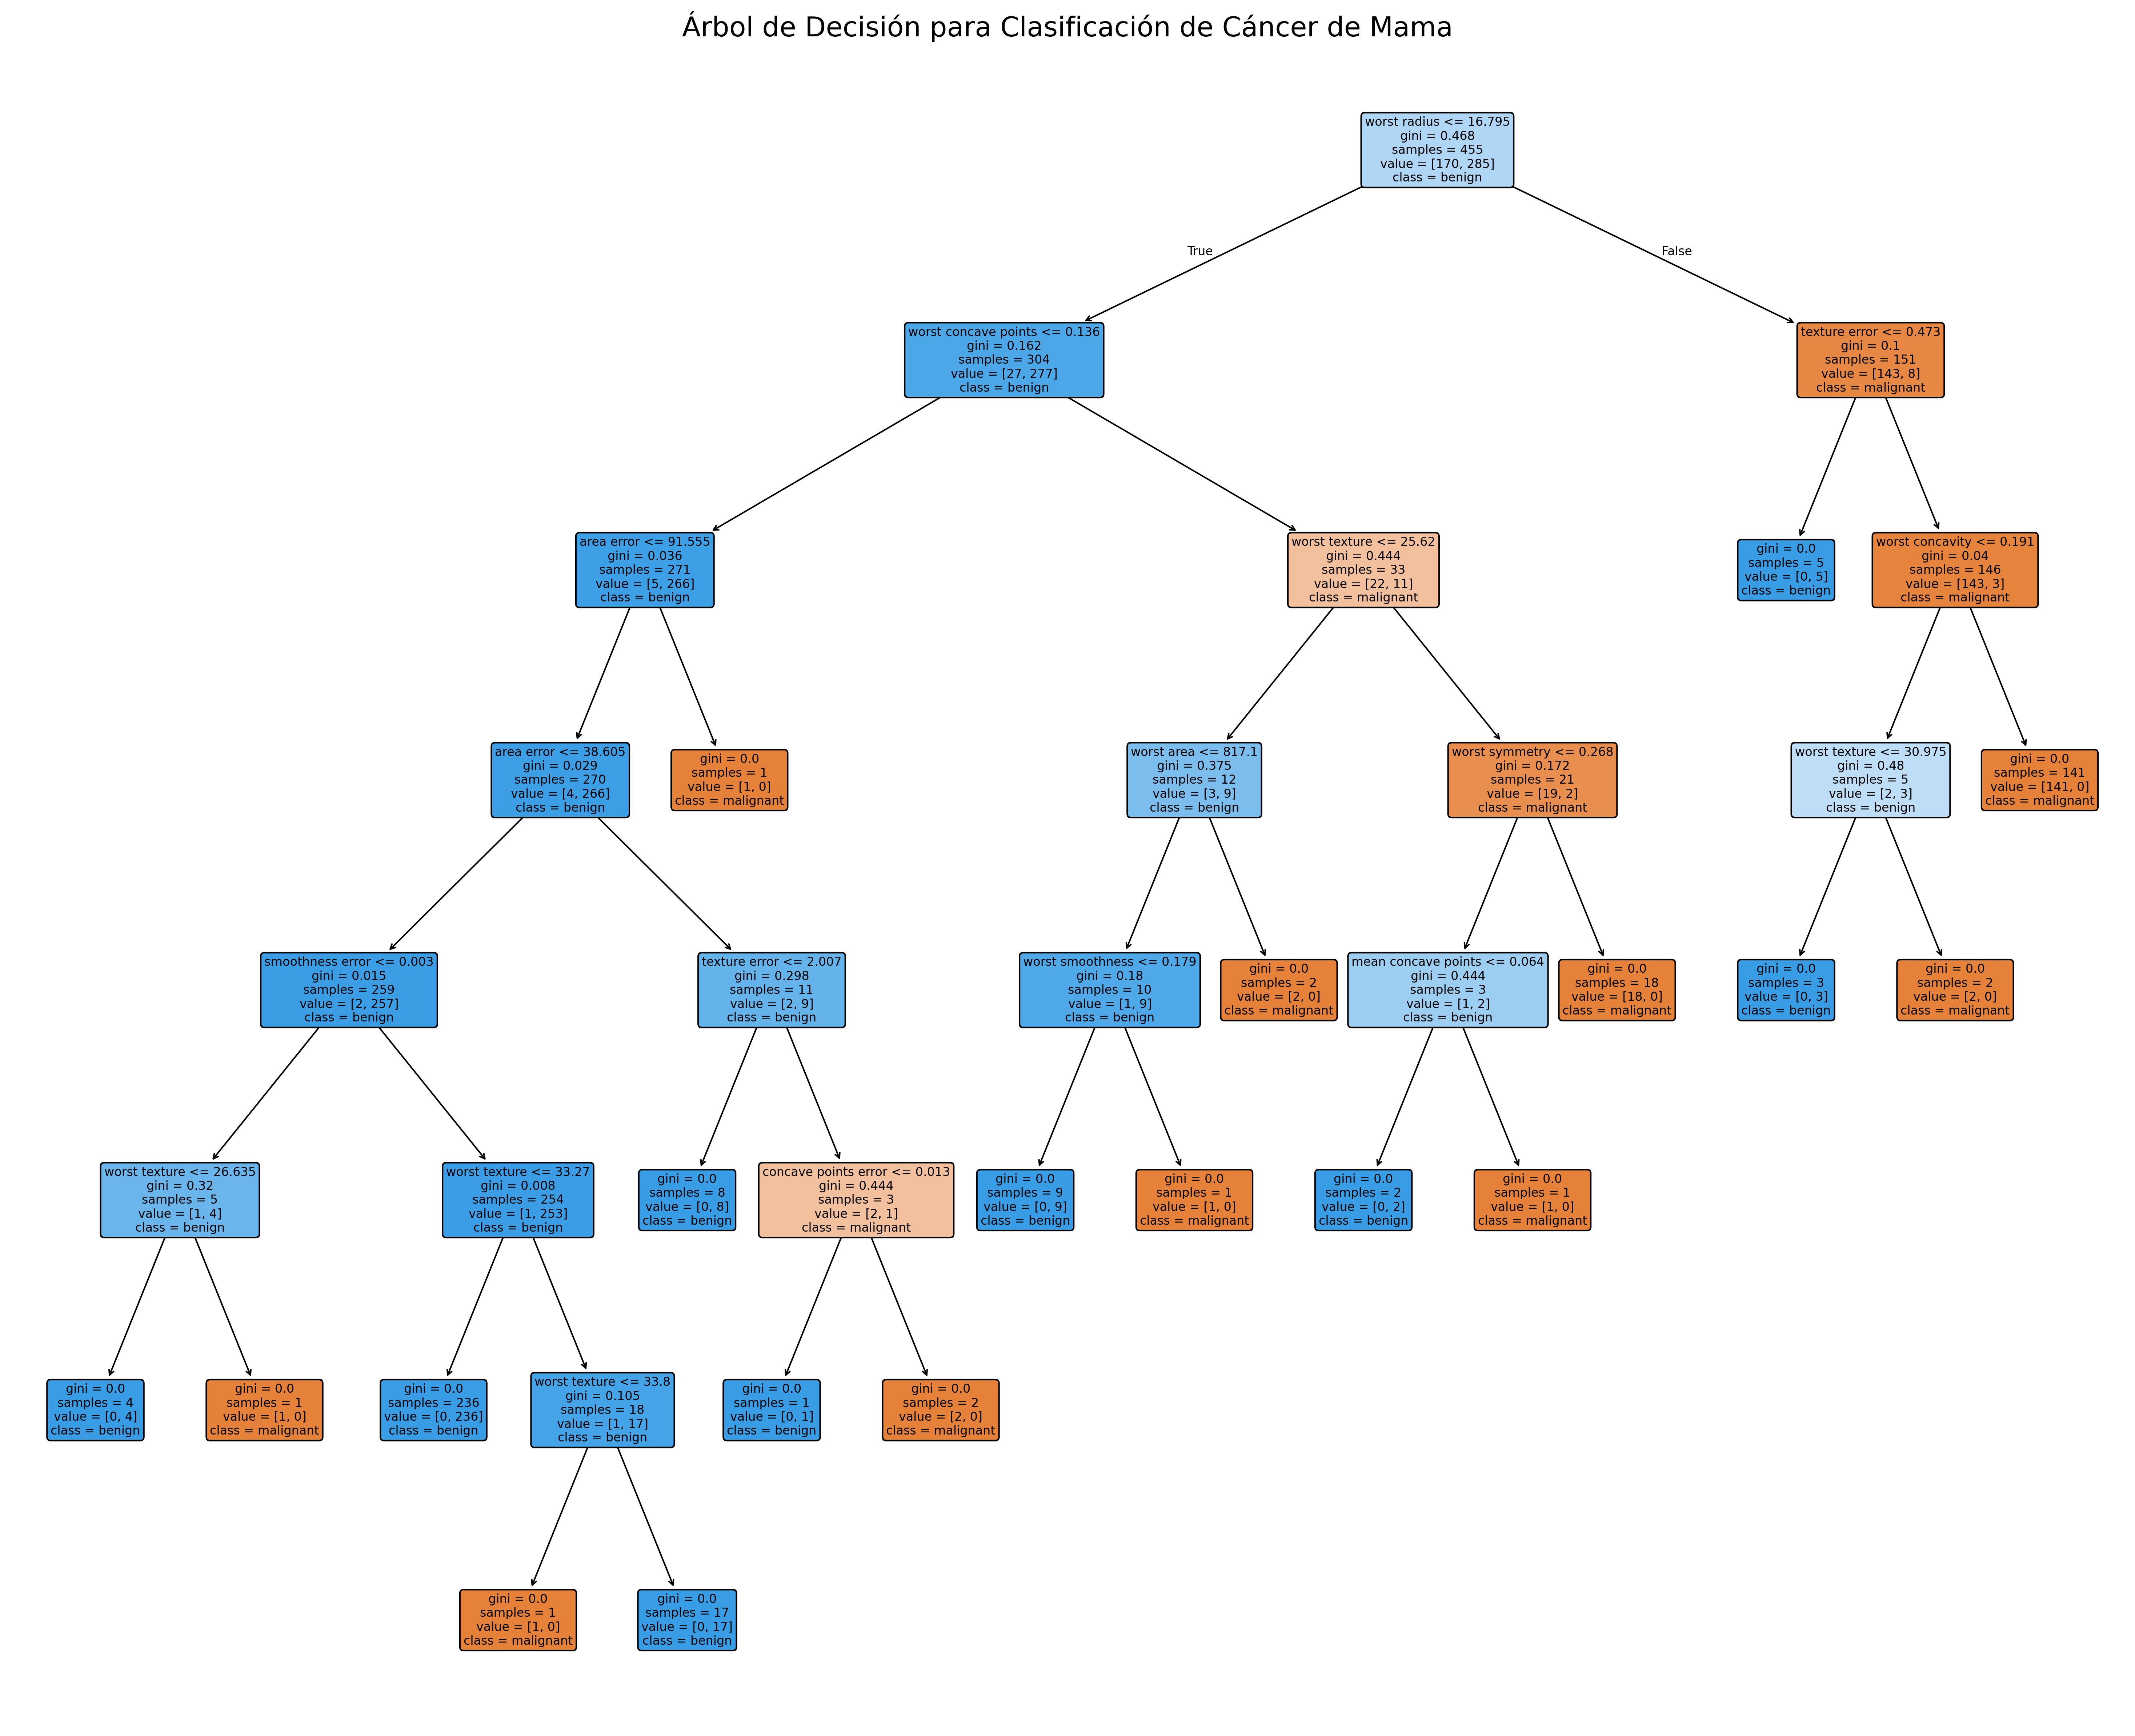

In [16]:
# Visualizar el Árbol de Decisión con DPI=300
plt.figure(figsize=(25, 20), dpi=300)
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol de Decisión para Clasificación de Cáncer de Mama", fontsize=18)
plt.show()